In [1]:
# Survival analysis of heart failure patients.

In [2]:
# This is an survival analysis of patients after having heart failure.

# Time: follow-up period (days), since treatment. 
# Death event: If the patient died during the follow-up period, can be 0 (dead) or 1 (survived).
# Ex: If a patient died on the 20th day, it will be recorded as (20, 1) (notation is (time, death_event) )

# Sex: Male(1) or Female(0).
# Age: Age of patient.
# Smoking: Indicates whether the patient is a smoker(1) or not(0).
# High blood pressure: If a patient has high blood pressure(1) or not(0).   
# Diabetes: If the patient has diabetes(1) or not(0).
# Anaemia: Decrease of red blood cells(1) or not(0).
# Serum creatinine: Level of creatinine in the blood.
# Serum sodium: Level of sodium in the blood.
# Platelets: Levels of platelets (blood cells that help control bleeding) in the blood.
# Ejection fraction: Measurement of the percentage of blood leaving your heart each time it squeezes (contracts).
# Creatinine phosphokinase (CPK) : Level of the CPK enzyme in the blood.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [4]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [5]:
heart_df = pd.read_csv('heart_failure.csv')
heart_df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
heart_df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

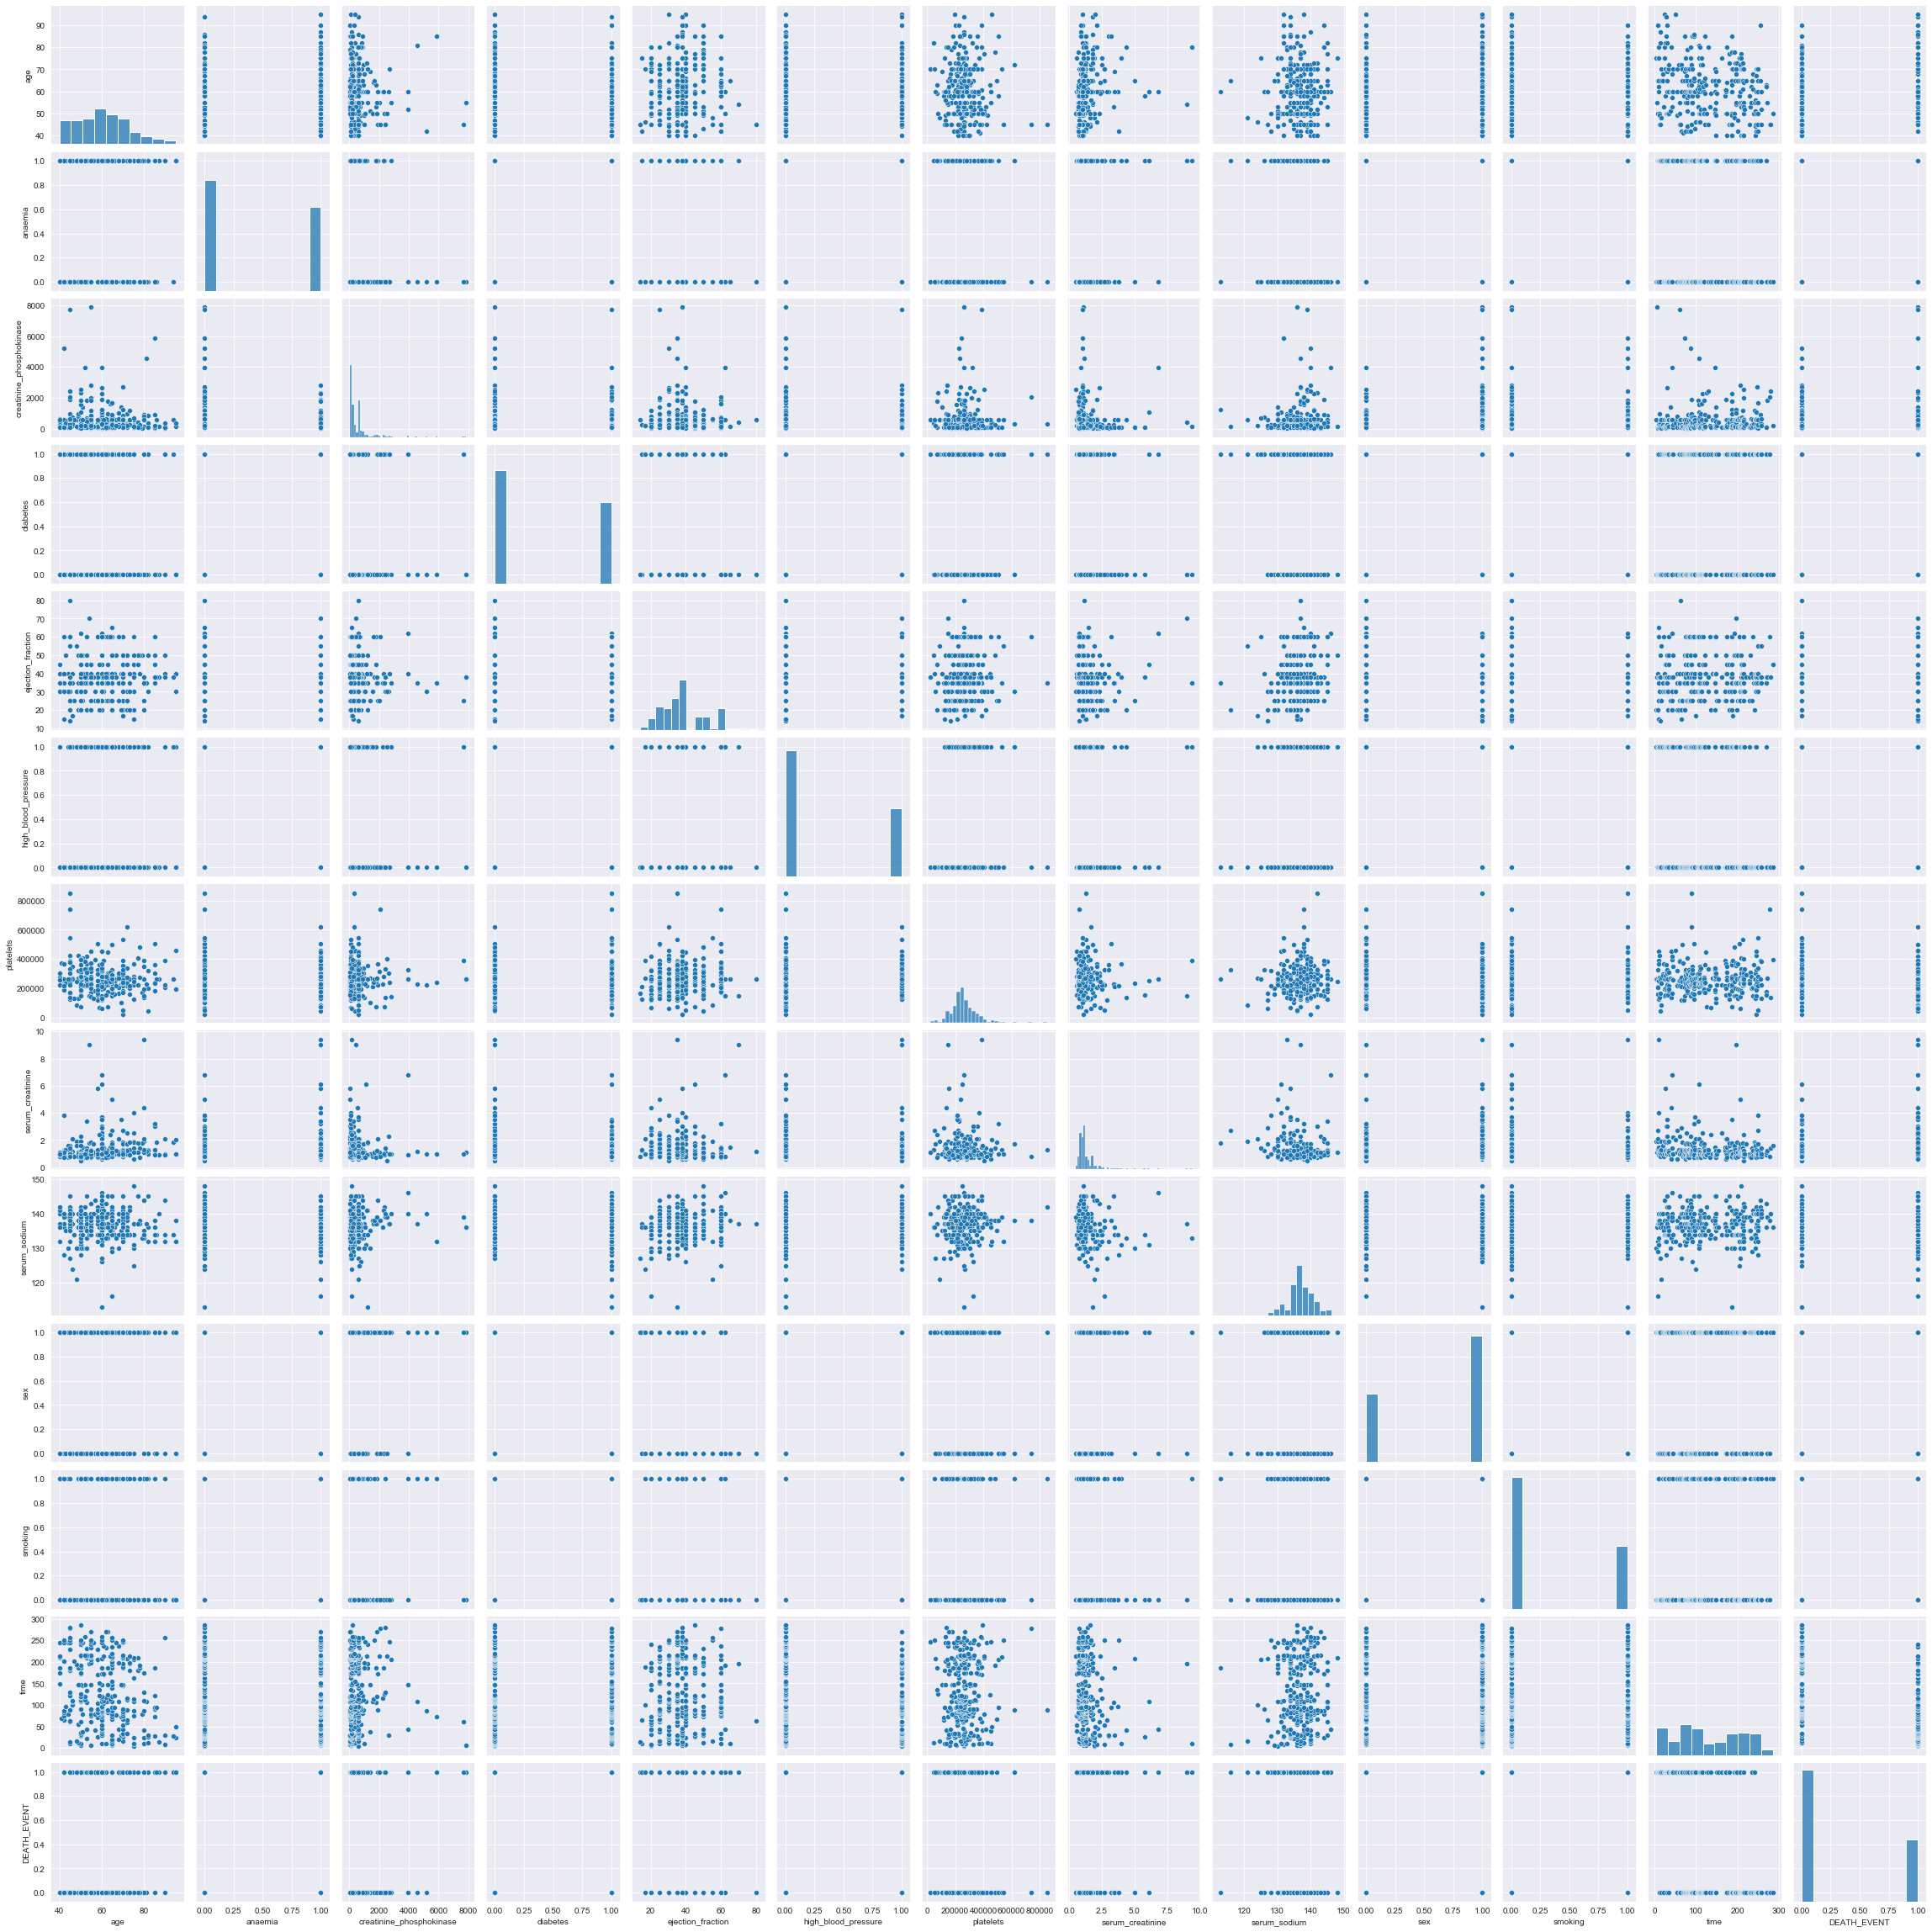

In [8]:
sns.pairplot(heart_df)
plt.show()

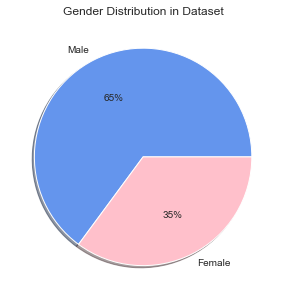

In [9]:
plt.pie(heart_df['sex'].value_counts(), labels = ['Male','Female'], colors = ['cornflowerblue', 'Pink'], autopct='%1.0f%%', shadow = True)
plt.title('Gender Distribution in Dataset')
plt.show()

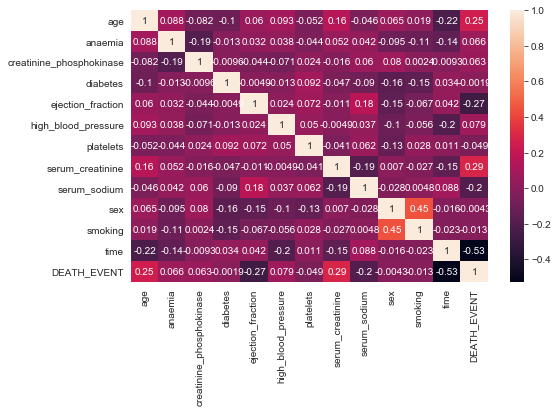

In [10]:
sns.heatmap(heart_df.corr(),annot=True)
plt.show()

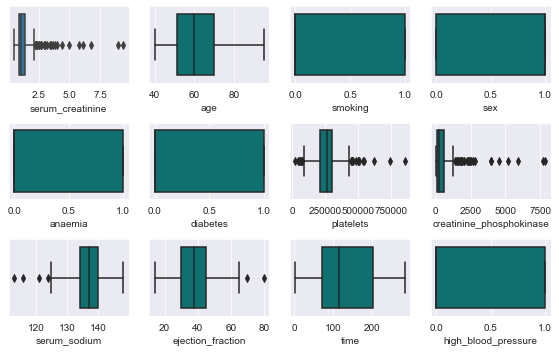

In [11]:
fig, axes = plt.subplots(3,4)


plt1 = sns.boxplot(x=heart_df.serum_creatinine, ax = axes[0,0])

plt2 = sns.boxplot(x=heart_df.age, ax = axes[0,1], color = 'teal')


plt3 = sns.boxplot(x=heart_df.smoking, ax = axes[0,2], color = 'teal')


plt4 = sns.boxplot(x=heart_df.sex, ax = axes[0,3], color = 'teal')


plt5 = sns.boxplot(x=heart_df.anaemia, ax = axes[1,0], color = 'teal')


plt6 = sns.boxplot(x=heart_df.diabetes, ax = axes[1,1], color = 'teal')


plt7 = sns.boxplot(x=heart_df.platelets, ax = axes[1,2], color = 'teal')


plt8 = sns.boxplot(x=heart_df.creatinine_phosphokinase, ax = axes[1,3], color = 'teal')


plt9 = sns.boxplot(x=heart_df.serum_sodium, ax = axes[2,0], color = 'teal')

plt10 = sns.boxplot(x=heart_df.ejection_fraction, ax = axes[2,1],  color = 'teal')


plt11 = sns.boxplot(x=heart_df.time, ax = axes[2,2], color = 'teal')


plt12 = sns.boxplot(x=heart_df.high_blood_pressure, ax = axes[2,3], color = 'teal')


plt.tight_layout()

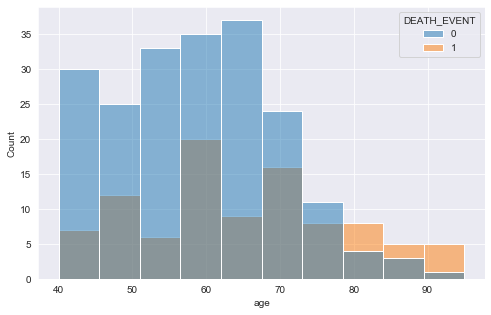

In [12]:
sns.histplot(x=heart_df['age'],hue=heart_df['DEATH_EVENT'])
plt.show()

In [13]:
import plotly.express as px
fig = px.histogram(heart_df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=heart_df.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

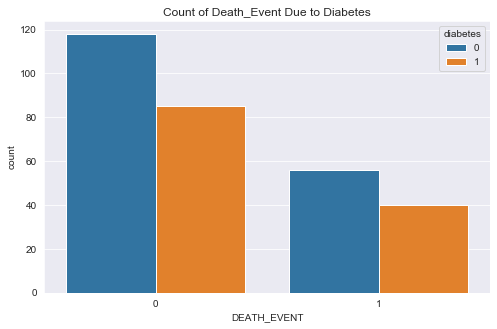

In [14]:
sns.countplot(x=heart_df['DEATH_EVENT'],hue=heart_df['diabetes'])
plt.title('Count of Death_Event Due to Diabetes')
plt.show()

In [15]:
import plotly.express as px
fig = px.histogram(heart_df, x="diabetes", color="DEATH_EVENT", marginal="violin", hover_data=heart_df.columns, 
                   title ="Distribution of DIABETES Vs DEATH_EVENT", 
                   labels={"deabetes": "DIABETES"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

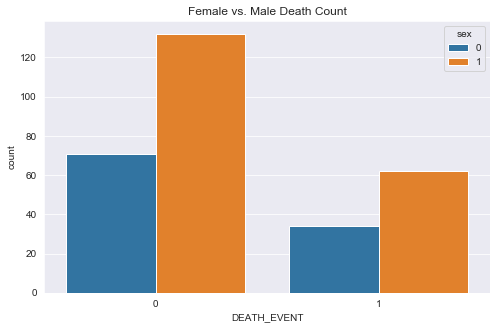

In [16]:
sns.countplot(x=heart_df['DEATH_EVENT'],hue=heart_df['sex'])
plt.title('Female vs. Male Death Count')
plt.show()

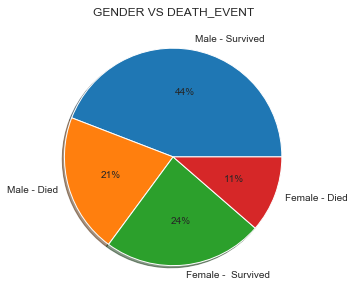

In [17]:
d1 = heart_df[(heart_df["DEATH_EVENT"]==0) & (heart_df["sex"]==1)]
d2 = heart_df[(heart_df["DEATH_EVENT"]==1) & (heart_df["sex"]==1)]
d3 = heart_df[(heart_df["DEATH_EVENT"]==0) & (heart_df["sex"]==0)]
d4 = heart_df[(heart_df["DEATH_EVENT"]==1) & (heart_df["sex"]==0)]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values2 = [len(d1),len(d2),len(d3),len(d4)]
plt.pie(values2, labels = label2, autopct='%1.0f%%', shadow = True)
annotations=[dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
plt.title('GENDER VS DEATH_EVENT')
plt.show()



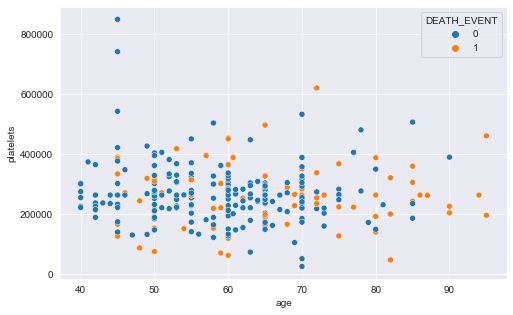

In [18]:
sns.scatterplot(x=heart_df['age'],y=heart_df['platelets'],hue=heart_df['DEATH_EVENT'])
plt.show()

In [19]:
import plotly.express as px
fig = px.histogram(heart_df, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=heart_df.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

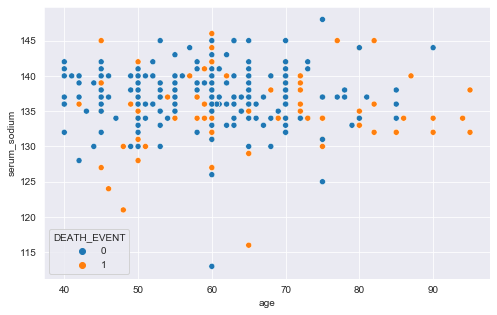

In [20]:
sns.scatterplot(x=heart_df['age'],y=heart_df['serum_sodium'],hue=heart_df['DEATH_EVENT'])
plt.show()

In [21]:
import plotly.express as px
fig = px.histogram(heart_df, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=heart_df.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

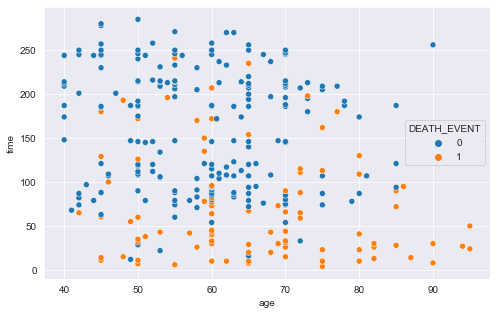

In [22]:
sns.scatterplot(x=heart_df['age'],y=heart_df['time'],hue=heart_df['DEATH_EVENT'])
plt.show()

/Users/jaycaceres1/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



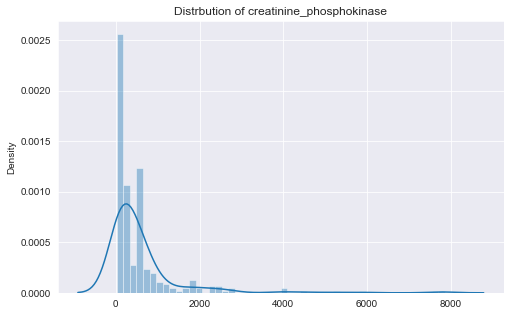

In [23]:
sns.distplot(x=heart_df["creatinine_phosphokinase"])
plt.title('Distrbution of creatinine_phosphokinase')
plt.show()

In [24]:
import plotly.express as px
fig = px.histogram(heart_df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=heart_df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

/Users/jaycaceres1/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



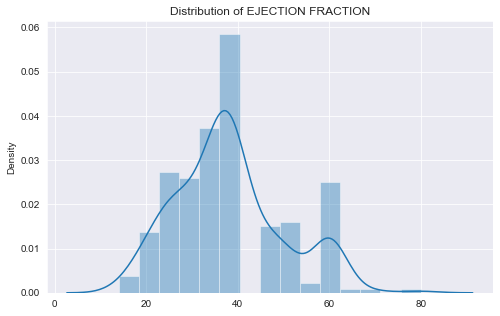

In [25]:
sns.distplot(x=heart_df["ejection_fraction"])
plt.title('Distribution of EJECTION FRACTION')
plt.show()

In [26]:
import plotly.express as px
fig = px.histogram(heart_df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart_df.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [27]:
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:,-1]

[0.09136432 0.02344058 0.07527317 0.03016142 0.13388332 0.02429709
 0.07343328 0.11836175 0.09058606 0.02725001 0.02691459 0.2850344 ]


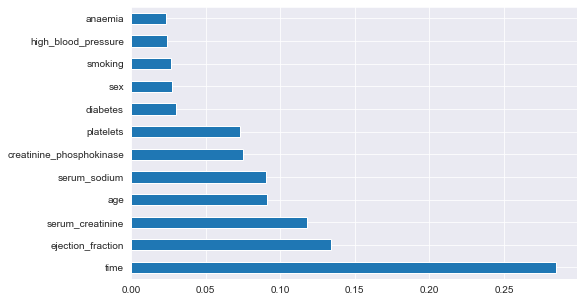

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [29]:
# Scaling the data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_labels = list(X.columns.values.tolist()) # Grabbing column labels, to use when converting our data back into dataframe.
Scaled_data = scaler.fit_transform(X.to_numpy()) # Scalar method requires turning data to numpy array
Scaled_data = pd.DataFrame(Scaled_data, columns = column_labels) # Turning our data back into a data frame.

In [30]:
# Splitting the data into training and testing sets.

from sklearn.model_selection import train_test_split

# Using a standard split of 0.3 (70% training data and 30% testing)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size = 0.3)

In [31]:
# Visualization of data split.

print(f'Independent variables train set shape: {X_train.shape}')
print(f'Independent variables test set shape: {X_test.shape}')
print(f'Dependent variables train set shape: {y_train.shape}')
print(f'Dependent variables test set shape: {y_test.shape}')

# Model will have 209 different observations to be used for training.
# After training is done we will test the model with 90 different observations.

Independent variables train set shape: (209, 12)
Independent variables test set shape: (90, 12)
Dependent variables train set shape: (209,)
Dependent variables test set shape: (90,)


In [32]:
# Initial model using all features creation

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 130)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=130)

In [33]:
# Evaluation of the initial model

from sklearn.metrics import accuracy_score

Predictions = LR.predict(X_test)
Accuracy_Score = accuracy_score(y_test,Predictions)
print("Logistic Regression Success Rate is :", Accuracy_Score)  # Sucess rate of train model (ratio of correct predictions)

# We see that we have a Success rate of 0.811 which would mean we correctly classified 73/90 observation from the test data.

Logistic Regression Success Rate is : 0.8111111111111111


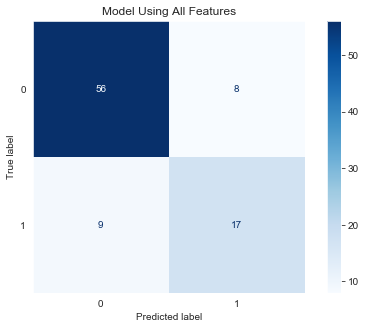

In [34]:
# Confusion matrix for initial model

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Blues) # Plot of confusion matrix
plt.title('Model Using All Features')
plt.grid(None) # Getting rid of unnecessary grid

# From what we see below the model incorrectly predicted that 9 people would recover when they did in fact die.
# It also incorrectly predicted that 8 people would die when they actually recovered.

In [35]:
# Classification report metric
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

# Precision quantifies the number of positive class predictions that actually belong to the positive class. 
# Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        64
           1       0.68      0.65      0.67        26

    accuracy                           0.81        90
   macro avg       0.77      0.76      0.77        90
weighted avg       0.81      0.81      0.81        90



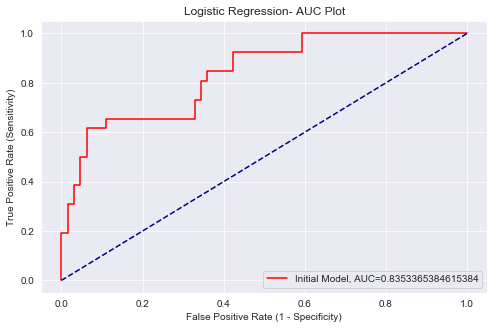

In [36]:
# Area under ROC curve metric
# Summarization of the trade-off between the true positive rate and false positive rate for a predictive model.

from sklearn import metrics

y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label = "Initial Model, AUC="+str(auc), color = 'red')
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Logistic Regression- AUC Plot')
plt.legend(loc=4)
plt.show()

# We know the Area Under ROC Curve represents a model's ability to discriminate between positive and negative classes.
# An area of 0.835 below the curve represents that our model has a good predictive power.

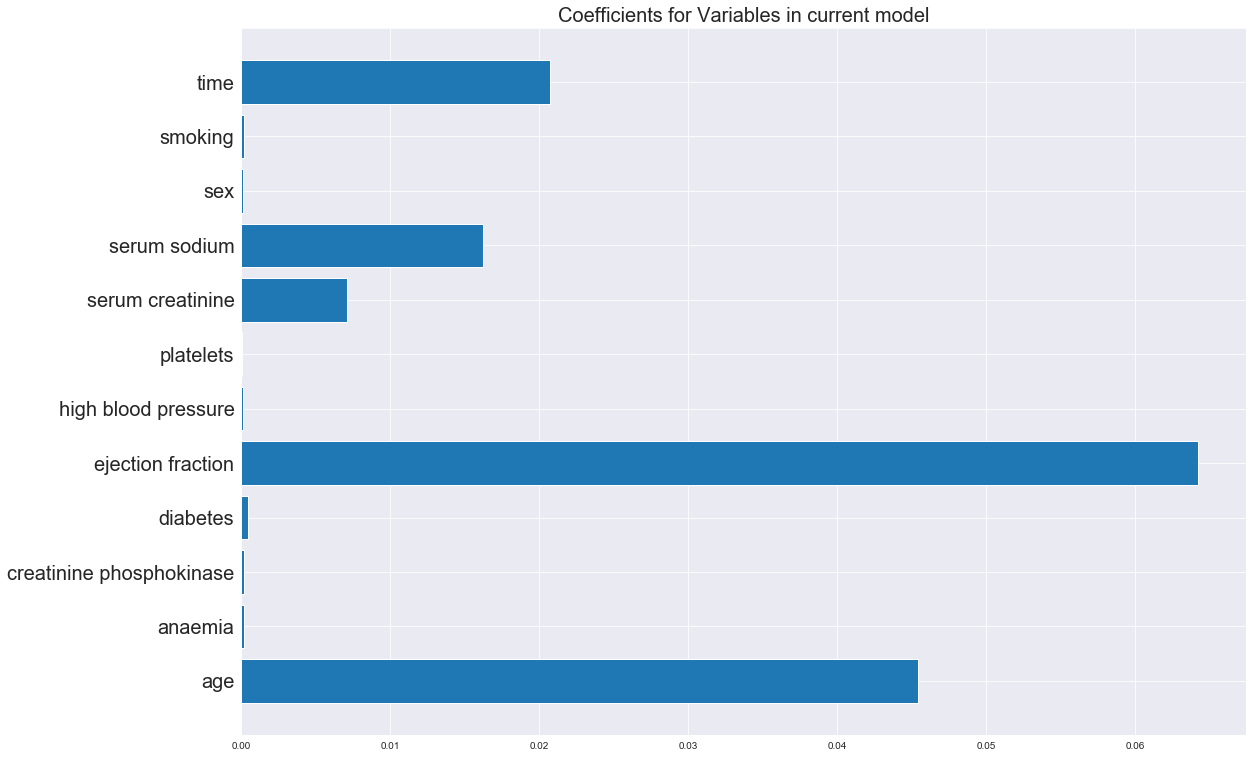

In [37]:
# What are the features that have the most impact when trying to predict a death event after heart failure has happened?

# Taking a look at the values of the coefficients of the independent variables by plotting them.

coefs = LR.coef_
coefs = coefs[0]
coefsabs = abs(coefs)
labels = X.columns.values
labelsspace = [i.replace('_', ' ') for i in labels]
plt.figure(figsize=(18, 13))
ax = plt.subplot()
plt.barh(range(len(coefsabs)), coefsabs)
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(labelsspace, fontsize = 20)
plt.title('Coefficients for Variables in current model', fontsize = 20)
plt.show()

In [38]:
# As we can see above age, ejection_fraction, serum_creatinine, serum_sodium and time are the features with the most influence in our model.
# We can also confirm this by looking at the heatmap all these features are the most correlated with the death event outcome.

# Feature selecting 
X = X[['age' , 'ejection_fraction', 'serum_creatinine', 'serum_sodium','time']]

In [39]:
# Building a Second model out of the most influential features.

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size = 0.3)

# Visualization of data split.
print(f'Independent variables train set shape: {X_train.shape}')
print(f'Independent variables test set shape: {X_test.shape}')
print(f'Dependent variables train set shape: {y_train.shape}')
print(f'Dependent variables test set shape: {y_test.shape}')

# As we can see we still have the same number of observations for each training and testing but the number of columns was reduced from 12 to 5.

Independent variables train set shape: (209, 5)
Independent variables test set shape: (90, 5)
Dependent variables train set shape: (209,)
Dependent variables test set shape: (90,)


In [40]:
# Fitting of the feature selected model.

LR = LogisticRegression(max_iter = 130)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=130)

In [41]:
# Evaluation of the feature selected model

from sklearn.metrics import accuracy_score

Predictions = LR.predict(X_test)
Accuracy_Score = accuracy_score(y_test,Predictions)
print("Logistic Regression Success Rate is :", Accuracy_Score)  # Sucess rate of train model (ratio of correct predictions)

# We see that we have a Success rate of 0.833 which would mean we correctly classified 75/90 observation from the test data.
# We get a better accuracy score with this feature selected model, indicating the features selected are good predictors for our target variable.
# Only including these features has more of a positive effect in terms of predictive power than when using all of them.

Logistic Regression Success Rate is : 0.8333333333333334


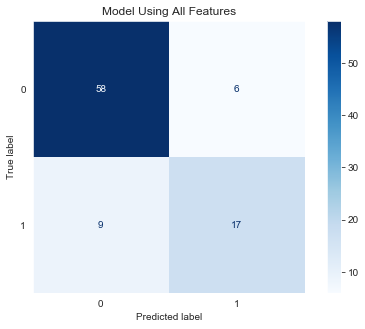

In [42]:
# Confusion matrix for feature selected model

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Blues) # Plot of confusion matrix
plt.title('Model Using All Features')
plt.grid(None) # Getting rid of unnecessary grid

# From what we see below the model incorrectly predicted that 9 people would recover when they did in fact die.
# It also incorrectly predicted that 6 people would die when they actually recovered.

In [43]:
# Classification report metric
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        64
           1       0.74      0.65      0.69        26

    accuracy                           0.83        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.83      0.83      0.83        90



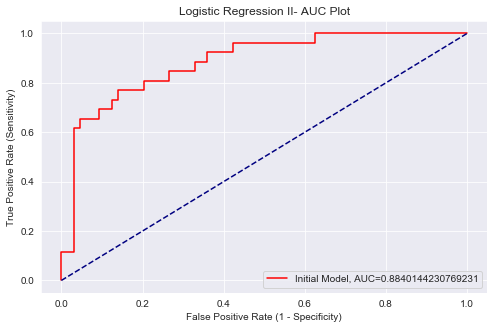

In [44]:
# Area under ROC curve metric of feature selected model.

y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label = "Initial Model, AUC="+str(auc), color = 'red')
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Logistic Regression II- AUC Plot')
plt.legend(loc=4)
plt.show()

# Here too we see an improvement over the model containing all features. 
# An area of 0.885 below the curve represents that our model has a great predictive power.

In [45]:
# Knowing that these feature are more relevant than the others is really important because it can save us a lot of time when gathering our data.
# We can prioritize the gathering of these features over the others in case we don't have the resources or time to get to the others.
# Not to take away from the rest of the features, they are also good indicator of the way our predictions might go. 
# But when time is of essence or resources aren't there; age, ejection_fraction, serum_creatinine, serum_sodium and time should be priority.

In [46]:
##comparing the logistic regression model with another classification model, KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

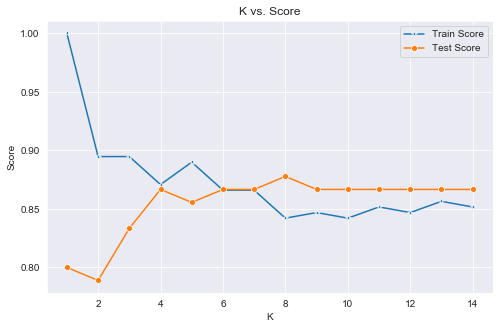

In [48]:
sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [49]:
knn = KNeighborsClassifier(8)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8777777777777778

In [50]:
from sklearn.metrics import accuracy_score

Predictions_knn = knn.predict(X_test)
Accuracy_Score = accuracy_score(y_test,Predictions_knn)
print("KNN Success Rate is :", Accuracy_Score) 


KNN Success Rate is : 0.8777777777777778


In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        64
           1       0.94      0.62      0.74        26

    accuracy                           0.88        90
   macro avg       0.90      0.80      0.83        90
weighted avg       0.89      0.88      0.87        90

[[63  1]
 [10 16]]


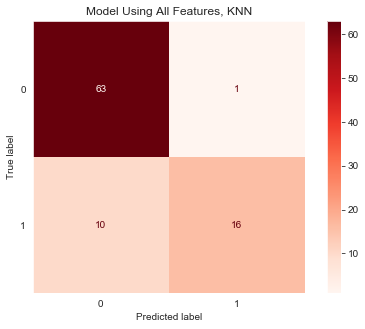

In [52]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Reds) 
plt.title('Model Using All Features, KNN')
plt.grid(None)

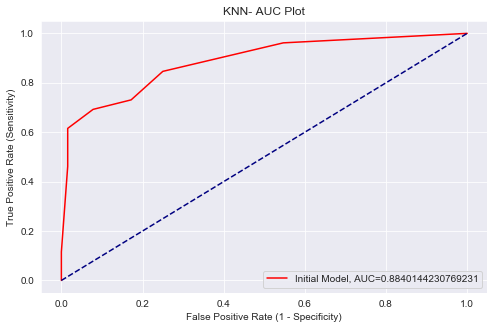

In [53]:
y_pred_probb = knn.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_probb)

auc1 = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr1,tpr1,label = "Initial Model, AUC="+str(auc1), color = 'red')
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('KNN- AUC Plot')
plt.legend(loc=4)
plt.show()

In [54]:
#We will look at the ANN model here
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, activation='relu',hidden_layer_sizes=(256,128,64,32),random_state = 223)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), max_iter=1000,
              random_state=223)

In [55]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[60  4]
 [10 16]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        64
           1       0.80      0.62      0.70        26

    accuracy                           0.84        90
   macro avg       0.83      0.78      0.80        90
weighted avg       0.84      0.84      0.84        90



ran a gridsearch cross validation on the ANN to see which parametres will be the best and it increased the accuracy just a bit. 

In [56]:
from sklearn.model_selection import GridSearchCV

model = MLPClassifier(max_iter=2000)
parameter_space = {
    'hidden_layer_sizes': [(368,), (555,), (100,)],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,.01,.03,.07, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 1000, 5000, 10000]
}
gsc = GridSearchCV(
    model,
    parameter_space,
    cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [57]:
grid_result = gsc.fit(X_train,y_train)
best_params = grid_result.best_params_

In [58]:
best_params

{'activation': 'logistic',
 'alpha': 0.03,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'max_iter': 5000,
 'solver': 'adam'}

In [59]:
grid_predictions = gsc.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('Score: ', gsc.score(X_test, y_test))

[[61  3]
 [10 16]]
Score:  0.8555555555555555


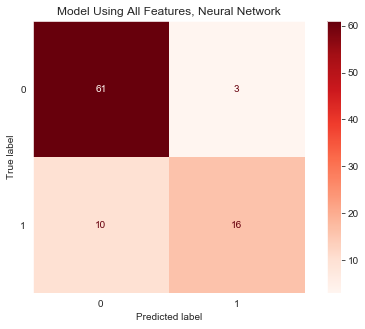

In [60]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gsc, X_test, y_test, cmap=plt.cm.Reds) 
plt.title('Model Using All Features, Neural Network')
plt.grid(None)

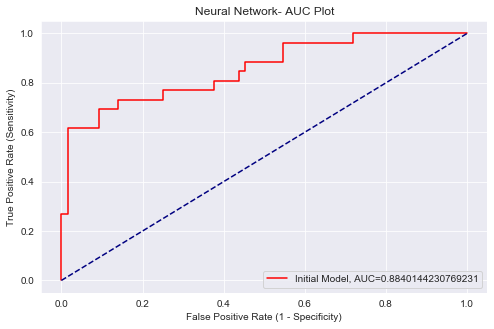

In [61]:
y_pred_probb = gsc.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_probb)

auc2 = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr2,tpr2,label = "Initial Model, AUC="+str(auc2), color = 'red')
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Neural Network- AUC Plot')
plt.legend(loc=4)
plt.show()